# Requests

Will access APIs. So, it's very reliable, but the site most have an accessible API. I've never released a real product using this, so my code is probably pretty janky, but it should work.

In [5]:
#for the API
import requests as rq
#pulling a subset of the requests package for ease of use
from requests.exceptions import HTTPError
#for data manipulation
import pandas as pd

In [6]:
#Set the API URL
url = 'https://api.collegefootballdata.com/rankings?year=2012'

#Connect to the API. If it fails, raise a helpful error.
try:
    response = requests.get(url)
    response.raise_for_status()
except HTTPError as http_err:
    print('HTTP error occurred: ' + str(http_err))
except Exception as err:
    print('Other error occurred: ' + str(err))
else:
    pass

#Read all API data
source = requests.get(url).json()

In [7]:
#Rawest output of all API data
print(source)

[{'season': 2012, 'seasonType': 'regular', 'week': 14, 'polls': [{'poll': 'Coaches Poll', 'ranks': [{'rank': 25, 'school': 'Rutgers', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 152}, {'rank': 23, 'school': 'Louisville', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 184}, {'rank': 22, 'school': 'Utah State', 'conference': 'Western Athletic', 'firstPlaceVotes': 0, 'points': 264}, {'rank': 24, 'school': 'Michigan', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 158}, {'rank': 13, 'school': 'Nebraska', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 765}, {'rank': 20, 'school': 'Northwestern', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 314}, {'rank': 15, 'school': 'Boise State', 'conference': 'Mountain West', 'firstPlaceVotes': 0, 'points': 479}, {'rank': 1, 'school': 'Notre Dame', 'conference': 'FBS Independents', 'firstPlaceVotes': 56, 'points': 1469}, {'rank': 3, 'school': 'Georgia', 'conference': 'SEC', 'firstPlaceVotes': 1, '

The data above is a list containing sub dictionaries and lists, so we'll have to alter it to get a useable dataset. '[' indicates the beginning of a list, '{' the beginning of a dictionary.

In [12]:
#So let's start by taking each element of the outermost list.
for a in source:
    print(a)
    #"break" will stop the code from moving to the next list. So this code will only take the first list
    break

{'season': 2012, 'seasonType': 'regular', 'week': 14, 'polls': [{'poll': 'Coaches Poll', 'ranks': [{'rank': 25, 'school': 'Rutgers', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 152}, {'rank': 23, 'school': 'Louisville', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 184}, {'rank': 22, 'school': 'Utah State', 'conference': 'Western Athletic', 'firstPlaceVotes': 0, 'points': 264}, {'rank': 24, 'school': 'Michigan', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 158}, {'rank': 13, 'school': 'Nebraska', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 765}, {'rank': 20, 'school': 'Northwestern', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 314}, {'rank': 15, 'school': 'Boise State', 'conference': 'Mountain West', 'firstPlaceVotes': 0, 'points': 479}, {'rank': 1, 'school': 'Notre Dame', 'conference': 'FBS Independents', 'firstPlaceVotes': 56, 'points': 1469}, {'rank': 3, 'school': 'Georgia', 'conference': 'SEC', 'firstPlaceVotes': 1, 'p

Since '{' is the first character in this list, "a" is a dictionary. A dictionary maps an item to another item. So, for example, the first element in the dictionary is 'season': 2012. That means that if we call 'season', it will return 2012. That means that this first lists season is 2012 (i.e. list "a" is for the 2012 season):

In [13]:
a['season']

2012

The next element of the dictionary is 'seasonType'

In [15]:
a['seasonType']

'regular'

The 'seasonType'for the first list is 'regular'

etc.

So, we want to take all of this info and make it useable. But we are only looking at the first list. Let's find all of the seasons (and other values) for each list.

In [16]:
#I removed "break" so that we can get all of the lists.
#Let's just take the "season" for each list.
for a in source:
    print(a['season'])

2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012


Each list is for the 2012 season

In [17]:
for a in source:
    print(a['seasonType'])

regular
regular
regular
regular
regular
regular
regular
regular
regular
regular
regular
regular
regular
regular
regular


Each seasonType is for regular

In [18]:
for a in source:
    print(a['week'])

14
13
12
11
10
9
8
7
6
5
15
4
3
2
1


The weeks are above. Now, looking at our complete dataset, the fourth element ('polls' : [{'poll: etc) is mapped to another list of dictionaries (ie a nested list), so we'll have to go deeper.

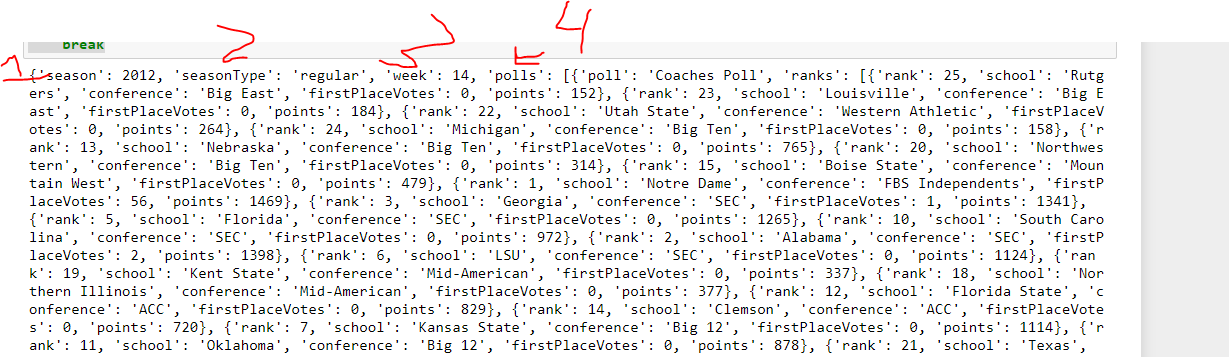

This can also be seen by using our original code:

In [23]:
for a in source:
    
    print(a['season'])
    print(a['seasonType'])
    print(a['week'])
    print(a['polls'])

2012
regular
14
[{'poll': 'Coaches Poll', 'ranks': [{'rank': 25, 'school': 'Rutgers', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 152}, {'rank': 23, 'school': 'Louisville', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 184}, {'rank': 22, 'school': 'Utah State', 'conference': 'Western Athletic', 'firstPlaceVotes': 0, 'points': 264}, {'rank': 24, 'school': 'Michigan', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 158}, {'rank': 13, 'school': 'Nebraska', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 765}, {'rank': 20, 'school': 'Northwestern', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 314}, {'rank': 15, 'school': 'Boise State', 'conference': 'Mountain West', 'firstPlaceVotes': 0, 'points': 479}, {'rank': 1, 'school': 'Notre Dame', 'conference': 'FBS Independents', 'firstPlaceVotes': 56, 'points': 1469}, {'rank': 3, 'school': 'Georgia', 'conference': 'SEC', 'firstPlaceVotes': 1, 'points': 1341}, {'rank': 5, 'school': 'Florida',

In [26]:
for a in source:
    
    print(a['season'])
    print(a['seasonType'])
    print(a['week'])
   
    b = a['polls']
    for c in b:
        print(c)
        break #keeps us on our first list contained in "b" so it's easier to read
        
    break #keeps us on our first list contained in "a" so it's easier to read

2012
regular
14
{'poll': 'Coaches Poll', 'ranks': [{'rank': 25, 'school': 'Rutgers', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 152}, {'rank': 23, 'school': 'Louisville', 'conference': 'Big East', 'firstPlaceVotes': 0, 'points': 184}, {'rank': 22, 'school': 'Utah State', 'conference': 'Western Athletic', 'firstPlaceVotes': 0, 'points': 264}, {'rank': 24, 'school': 'Michigan', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 158}, {'rank': 13, 'school': 'Nebraska', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 765}, {'rank': 20, 'school': 'Northwestern', 'conference': 'Big Ten', 'firstPlaceVotes': 0, 'points': 314}, {'rank': 15, 'school': 'Boise State', 'conference': 'Mountain West', 'firstPlaceVotes': 0, 'points': 479}, {'rank': 1, 'school': 'Notre Dame', 'conference': 'FBS Independents', 'firstPlaceVotes': 56, 'points': 1469}, {'rank': 3, 'school': 'Georgia', 'conference': 'SEC', 'firstPlaceVotes': 1, 'points': 1341}, {'rank': 5, 'school': 'Florida', 

In [32]:
for a in source:
    print(a['season'])
    print(a['seasonType'])
    print(a['week'])
   
    b = a['polls']
    for c in b:
        print(c['poll'])
        break
    break

2012
regular
14
Coaches Poll


So far, the first row of data is Season = 2012, seasonType = regular, week = 14, poll = 14. We will continue on like this until all we've dug to the bottom of each nested list. (final result to follow)

But, instead of just printing out the data, let's put it into a useable data base using Pandas. So, what I'll do is create lists to store all of the different categories (season, seasonType, week, etc), then I'll put them all into a dataframe. There is probably a cleaner way to do this, but my work doesn't require efficiency. Here's the final code required to pull and store data from this API:

In [33]:
#create storage lists
season_list = []
seasonType_list = []
week_list = []
poll_list = []
rank_list = []
school_list = []
conference_list = []
firstPlaceVotes_list = []
points_list = []

#assign URL
url = 'https://api.collegefootballdata.com/rankings?year=2012'

#checks if API site is available, if not tell us why
try:
    response = requests.get(url)
    response.raise_for_status()
except HTTPError as http_err:
    print('HTTP error occurred: ' + str(http_err))
except Exception as err:
    print('Other error occurred: ' + str(err))
else:
    pass

#get all API data
source = requests.get(url).json()

#walk through top layer of API Data
for a in source:
    b=a['polls']
    
    #walk through polls layer
    for c in b:
        d = c['ranks']
        
        #walk through ranks layer
        for e in d:
            
            #assign the found value to the list. NOTICE that each value corresponds to it's lowest layer. 
            #Season, seasonType, week's lowest layers are in 'a', poll is in 'c', the rest are in 'e'
            season_list.append(a['season'])
            seasonType_list.append(a['seasonType'])
            week_list.append(a['week'])
            poll_list.append(c['poll'])
            rank_list.append(e['rank'])
            school_list.append(e['school'])
            conference_list.append(e['conference'])
            firstPlaceVotes_list.append(e['firstPlaceVotes'])
            points_list.append(e['points'])
                
#this combines all of the lists in a dataframe
rankings_df = pd.DataFrame(list(zip(season_list,seasonType_list,week_list,poll_list,rank_list,school_list,
                                   conference_list,firstPlaceVotes_list,points_list)),
              columns=['season','seasonType','week','poll','rank','school','conference','firstPlaceVotes','points'])


Here is the final dataset

In [34]:
rankings_df

,season,seasonType,week,poll,rank,school,conference,firstPlaceVotes,points
0,2012,regular,14,Coaches Poll,25,Rutgers,Big East,0,152
1,2012,regular,14,Coaches Poll,23,Louisville,Big East,0,184
2,2012,regular,14,Coaches Poll,22,Utah State,Western Athletic,0,264
3,2012,regular,14,Coaches Poll,24,Michigan,Big Ten,0,158
4,2012,regular,14,Coaches Poll,13,Nebraska,Big Ten,0,765
...,...,...,...,...,...,...,...,...,...
1248,2012,regular,1,AFCA Division II Coaches Poll,1,Pittsburg State,None,21,0
1249,2012,regular,1,AFCA Division II Coaches Poll,9,Winston-Salem,None,1,0
1250,2012,regular,1,AFCA Division II Coaches Poll,12,Kutztown,None,0,0
1251,2012,regular,1,AFCA Division II Coaches Poll,3,Northwest Missouri State,None,1,0


# Selenium

Selenium is a web driver that will behave the same way a person would. 

I'll add some code here.

# AutoScraper

Seems like a more user-friendly web driver, but I don't have experience with it.

I'll add some code here.